# **- Starter Code**

In [1]:
#Starter Code
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# **- Given Functions**

In [2]:
#Function 1: Given an image, returns the image and it's squared version in array format
def toArrayAndSquare(im):
  img = [[0 for x in range(im.size[0])] for y in range(im.size[1])]
  sqr = [[0 for x in range(im.size[0])] for y in range(im.size[1])]
  for i in range (0,im.size[0]):
    for j in range (0,im.size[1]):
      img[j][i] = im.getpixel((i,j))
      sqr[j][i] = img[j][i] ** 2
  return img,sqr

#Function 2: Given an image, applies a certain threshold
def applyThreshold (im, th):
  res = [[0 for x in range(len(im[0]))] for y in range(len(im))]
  for i in range (0,len(im)):
    for j in range (0,len(im[0])):
      if(im[i][j]<th):
        res[i][j] = 0
      else:
        res[i][j] = 255
  return res    #O(m*n)

(480, 720)


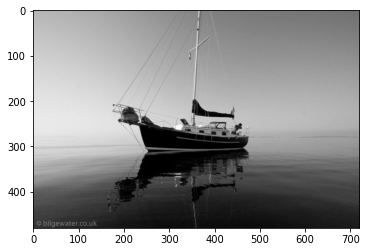

In [3]:
#Loading our image, converting it to grey scale and checking its size
img = Image.open('sample_image.jpg').convert('L')
plt.imshow(img,cmap = 'gray')
imgArray = np.array(img)
print(imgArray.shape)

Text(0, 0.5, 'Count')

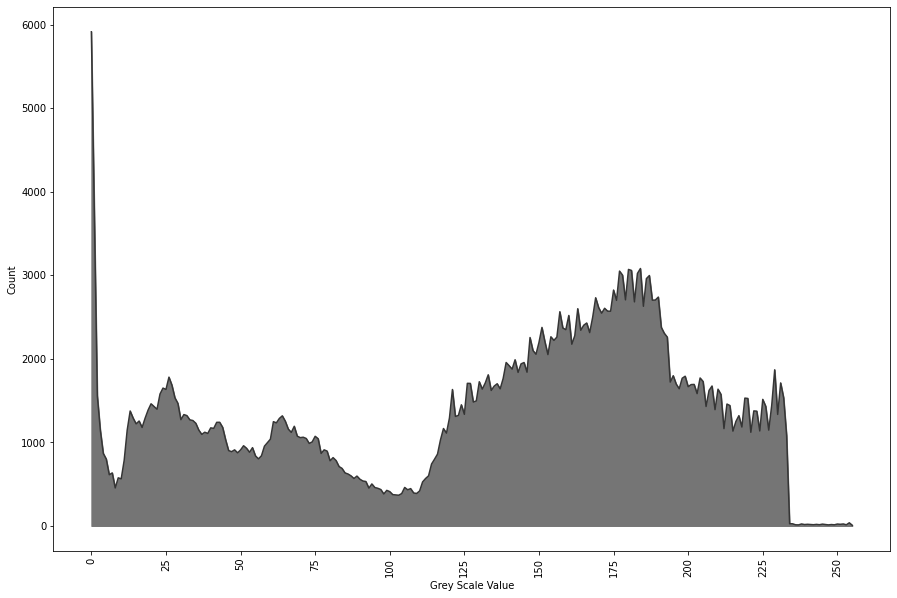

In [4]:
#plotting its histogram in an efficient way
histogram, bin_edges = np.histogram(img, bins=256, range=(0, 256))
plt.figure(figsize=(15,10))
sns.lineplot(x=np.arange(0,histogram.shape[0]),y=histogram,color="#353535")
plt.xticks(rotation='vertical')
plt.locator_params(axis='x', nbins=12)
plt.fill_between(np.arange(0,histogram.shape[0]),histogram,color="#757575")
plt.xlabel("Grey Scale Value")
plt.ylabel("Count")

# **TASK 1**

#### calculateCooccurrence

In [5]:
def calculateCooccurrence(img):
    imgArray = np.array(img) #get 2d numpy array of image ##np.matrix also works but not needed
    north_south = np.zeros((256,256), dtype=int) 
    west_east = np.zeros((256,256), dtype=int) 
    for i in range(len(imgArray)-1):
        for j in range(len(imgArray[i])):
            north_south[imgArray[i][j]][imgArray[i+1][j]]+=1
    for i in range(len(imgArray)):
        for j in range(len(imgArray[i])-1):
            west_east[imgArray[i][j]][imgArray[i][j+1]]+=1
    return north_south,west_east

 > **2 (m\*n) loops --> O(m\*n) time complexity since we are looping over our image**  

#### nullifyPixels

In [6]:
def nullifyPixels(coImage):
    res = coImage.copy()
    for i in range(len(coImage)):
        for j in range(len(coImage[i])):
            if(np.abs(i-j)<30):
                res[i][j] = 0
    return res

 > **1 (m\*n) loop --> O(m\*n) but in our case m and n are fixed values 255 since we are looping over our co\-occurrence matrix with fixed size of 255\*255** 
 >> **so it is O(255\*255) --> O(1)**

#### imgWithCooccurrence

In [7]:
def imgWithCooccurrence(img,null1,null2): #null1-->north_south_nullified #null2-->west_east_nullified
    imgArray = np.array(img) #get 2d numpy array of image ##np.matrix also works but not needed
    res = imgArray.copy()
    for i in range(len(res)-1): #ignoring last row and column : )
        for j in range(len(res[i])-1):
            if (null1[res[i][j]][res[i+1][j]]==0 and null2[res[i][j]][res[i][j+1]]==0):
                res[i][j]=0
            else:
                res[i][j]=255
    return res            

> **1 (m\*n) loop --> O(m\*n)**

## **Simulate/Implement edge detection using co-occurrence matrices**

In [8]:
north_south,west_east = calculateCooccurrence(img)
north_south_nullified = nullifyPixels(north_south)
west_east_nullified = nullifyPixels(west_east)
constructed_img = imgWithCooccurrence(img,north_south_nullified,west_east_nullified)

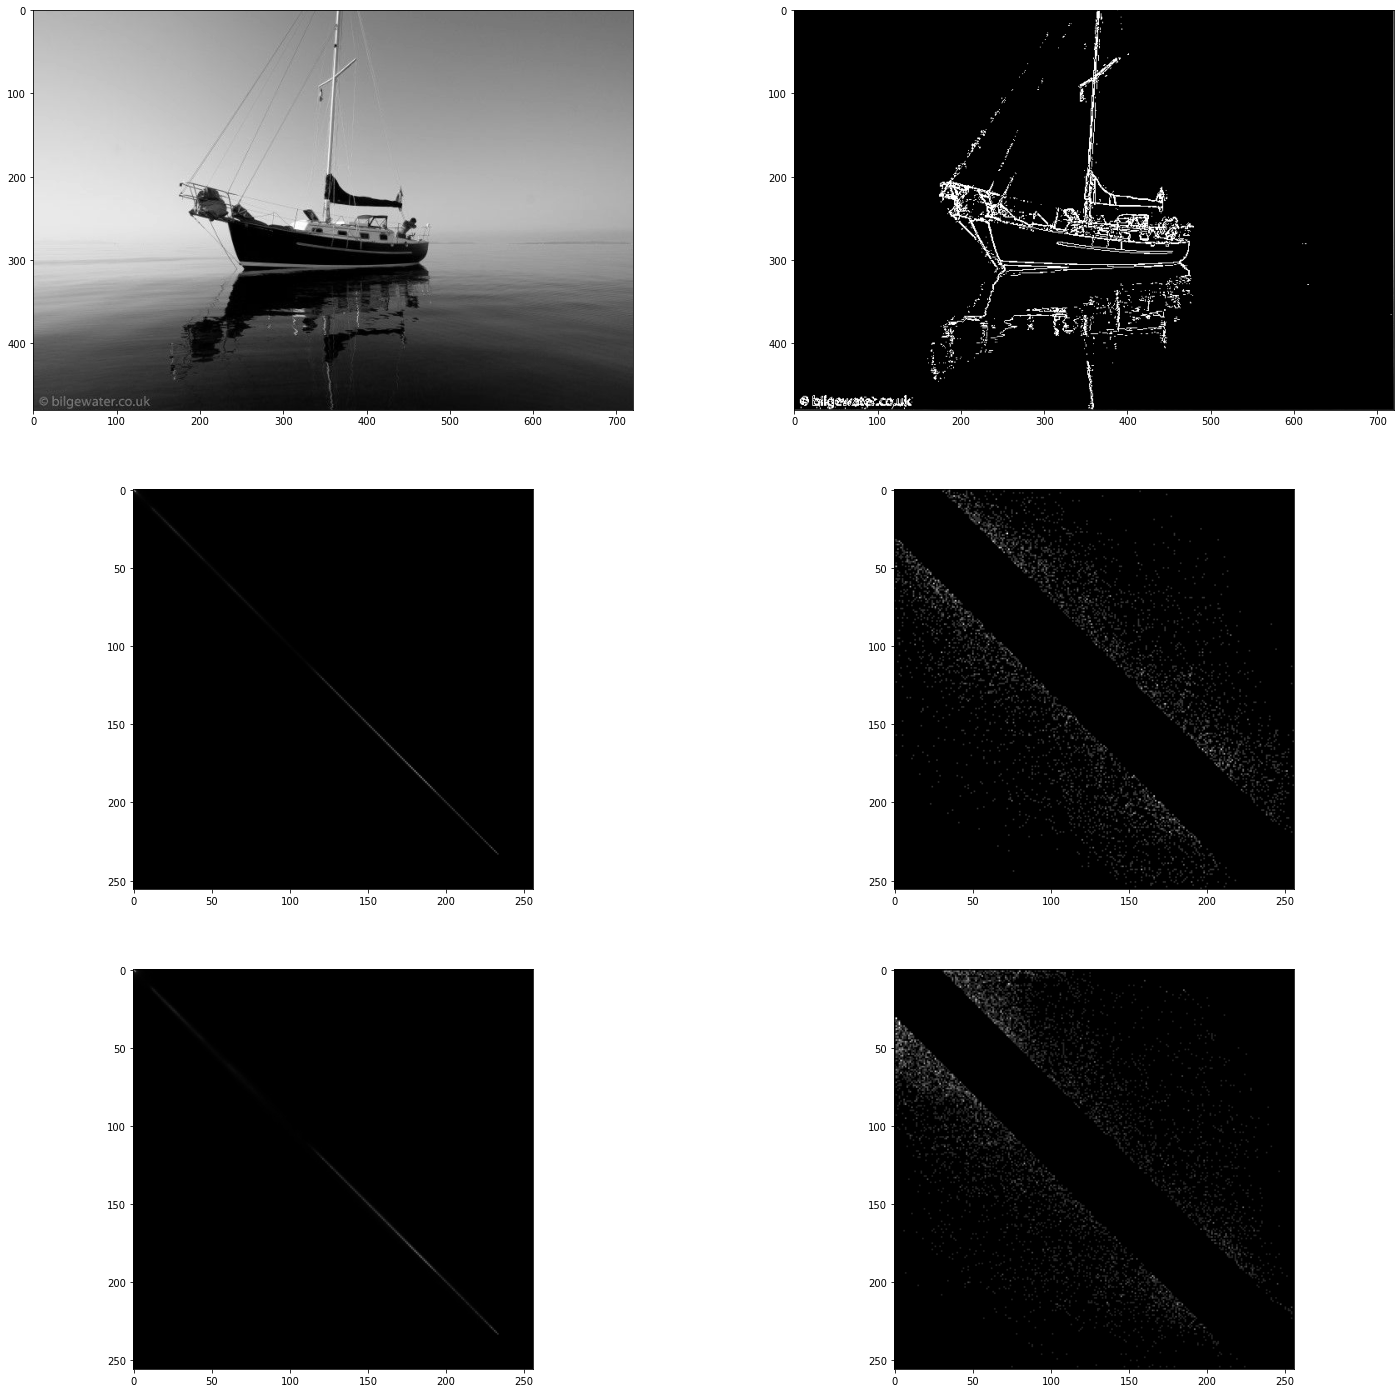

In [9]:
plt.subplots(nrows=3, ncols=2, figsize=(25, 25))

plt.subplot(3,2,1)
plt.imshow(img,  cmap = 'gray')

plt.subplot(3,2,2)
plt.imshow(constructed_img,  cmap = 'gray')

plt.subplot(3,2,3)
plt.imshow(west_east,  cmap = 'gray')

plt.subplot(3,2,4)
plt.imshow(west_east_nullified,  cmap = 'gray')

plt.subplot(3,2,5)
plt.imshow(north_south,  cmap = 'gray')

plt.subplot(3,2,6)
plt.imshow(north_south_nullified,  cmap = 'gray')

# **TASK 2**

#### squareImage

In [10]:
def squareImage(imgArray):
  res = imgArray.copy()
  res = res.astype('int64') #needed to handle big numbers
  for i in range(len(res)):
    for j in range(len(res[i])):
      res[i][j] = res[i][j] ** 2
  return res 

> **1 (m\*n) loop --> O(m\*n)**

In [11]:
def squareImage2(imgArray):
  res = imgArray.copy()
  res = res.astype('int64') #needed to handle big numbers
  return res**2   # this also works since we are using numpy arrays

#### integralArray

In [12]:
def integralArray(imgArray):
    res = imgArray.copy()
    res = res.astype('int64')
    for i in range(0,len(res)):
        for j in range(1,len(res[i])):
            res[i][j]+=res[i][j-1]
    for i in range(1,len(res)):
        for j in range(0,len(res[i])):
            res[i][j]+=res[i-1][j]
    return res 

    #integralArray = lambda x : np.cumsum(np.cumsum(x, axis=1) ,axis=0)
    #This is also doable but felt like cheating xD even though it is faster

> **2 (m\*n) loops --> O(m\*n)**

#### localSum

In [13]:
def localSum(integral_img,Xi,Xj,Yi,Yj):  #using integral image
    sum = 0
    x4 = integral_img[Yi][Yj]
    if(Xi>=1 and Xj>=1):
        x1 = integral_img[Xi-1][Xj-1]
    else:
        x1 = 0
    if(Xi>=1):
        x2 = integral_img[Xi-1][Yj]
    else:
        x2 = 0
    if(Xj>=1):
        x3 = integral_img[Yi][Xj-1]
    else:
        x3 = 0
    sum = x4 + x1 - x2 - x3
    return sum

> **Since we are adding and subtracting specific pixels from the integral image,**
>> **This computation has an O(1) time complexity**

#### imgWithIntegral

In [14]:
def imgWithIntegral(img,m,n):          #m-rows n-columns
    imgArray = np.array(img) #get 2d numpy array of image ##np.matrix also works but not needed
    sq_imgArray = squareImage(imgArray)
    integral_img = integralArray(imgArray)
    integral_sqImg = integralArray(sq_imgArray)
    v_step = int(m/2)
    h_step = int(n/2)
    N = m*n #windows size
    res = np.zeros((len(imgArray),len(imgArray[0])), dtype=float)
    for i in range(0+v_step,len(imgArray)-v_step):
        for j in range(0+h_step,len(imgArray[i])-h_step):
            res[i][j]=((1/N)*localSum(integral_sqImg,i-v_step,j-h_step,i+v_step,j+h_step))-(((1/N)*localSum(integral_img,i-v_step,j-h_step,i+v_step,j+h_step))**2)
            if(res[i][j]<0):
                res[i][j] = 0 
    return res

>* O(m*n) for calculating square of the original image
>* O(m*n) for calculating both integrals
>* O(m*n) for looping over the image
>* O(1) for calculating the variance for one pixel
>> **Overall O(m*n) time complexity**

# **Simulate/Implement edge detection using integral images**

In [15]:
sq_imgArray = squareImage(imgArray)
integral_img = integralArray(imgArray)
integral_sqImg = integralArray(sq_imgArray)
var_img = imgWithIntegral(img,3,3)
var_img_threshold = applyThreshold(var_img,750)

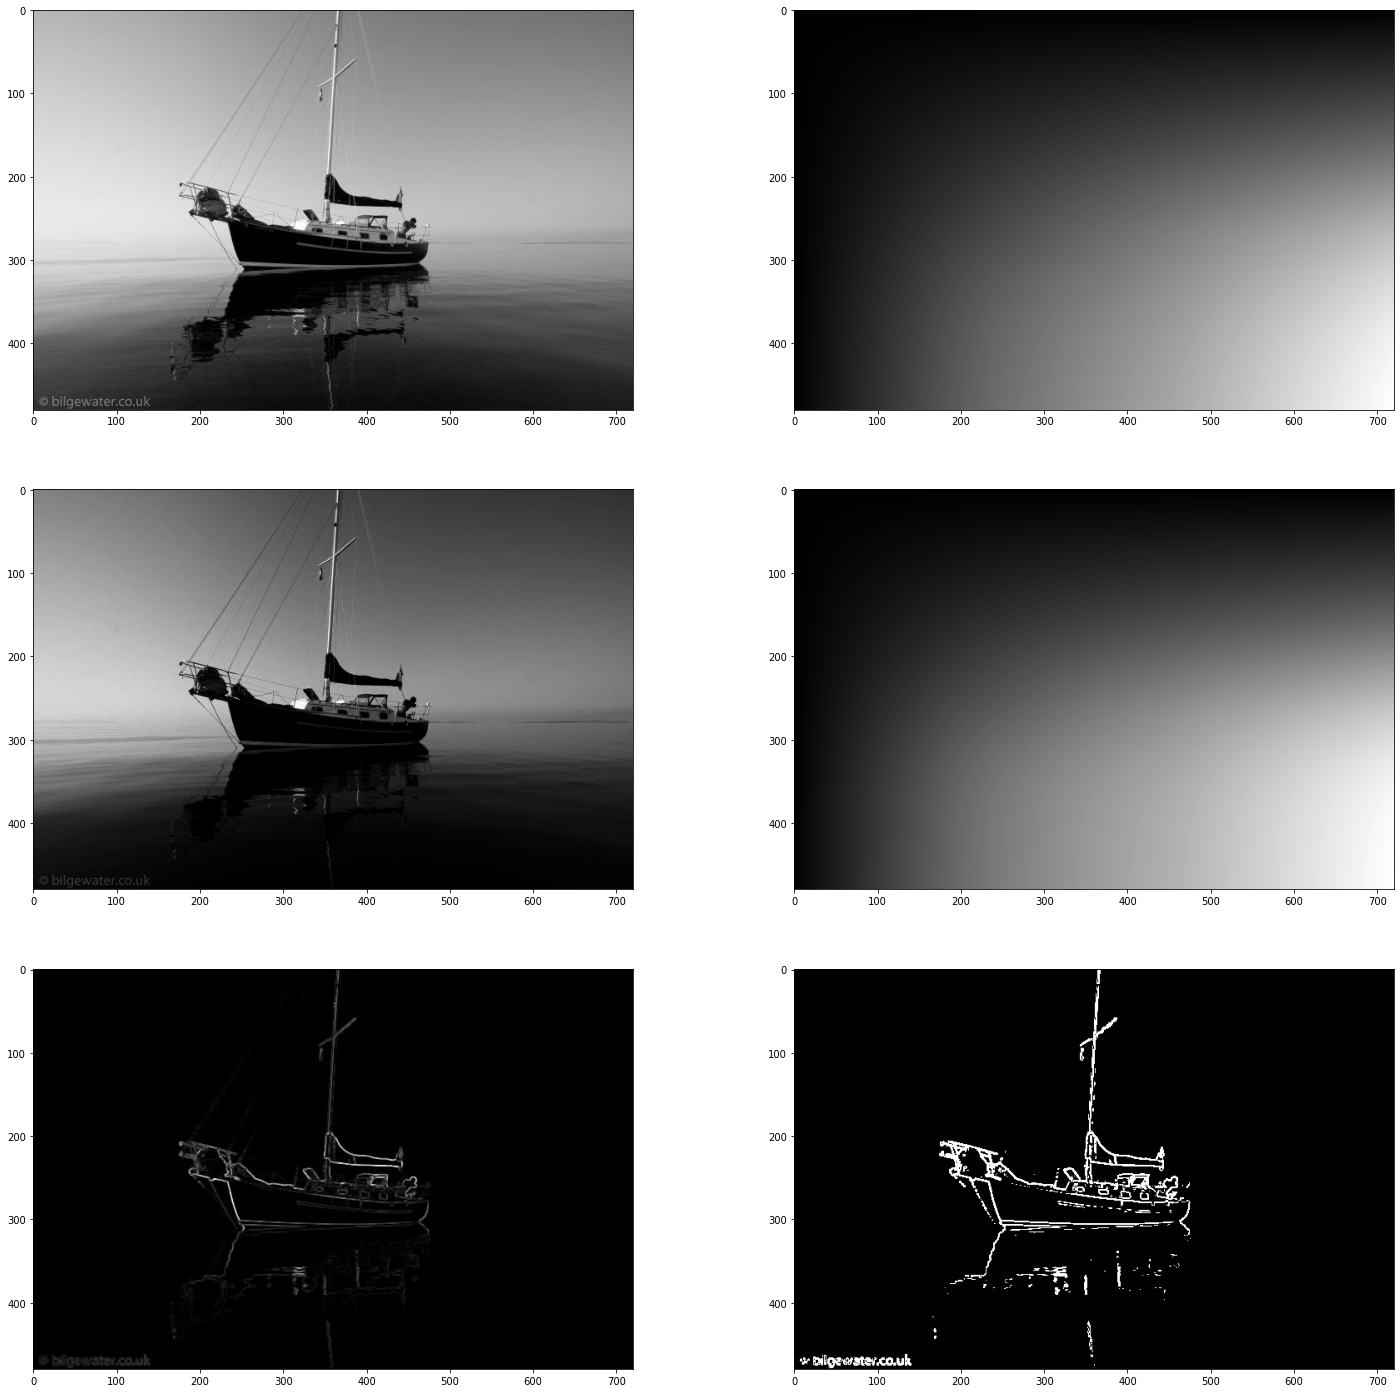

In [16]:
plt.subplots(nrows=3, ncols=2, figsize=(25, 25))

plt.subplot(3,2,1)
plt.imshow(img,  cmap = 'gray')

plt.subplot(3,2,2)
plt.imshow(integral_img,  cmap = 'gray')

plt.subplot(3,2,3)
plt.imshow(sq_imgArray,  cmap = 'gray')

plt.subplot(3,2,4)
plt.imshow(integral_sqImg,  cmap = 'gray')

plt.subplot(3,2,5)
plt.imshow(var_img,  cmap = 'gray')

plt.subplot(3,2,6)
plt.imshow(var_img_threshold,  cmap = 'gray')

# *-Conclusion*

- Both algorithms are similar in terms of effeciency and time complexity O(m*n) as explained.

- The result of the first algorithm (Co-occorunce) perserves most of the edges even some of the thin lines are perserved but the edges are not smooth and clear this is probably due too the fact that the algorithm determines the new value of the pixel taking into account only 3 pixels around it which results in nonconsistent values for pixels and an image that is not sharp. the image also relies heavily on the chosen threshold if too big, some of the thinner edges are lost and if too small, some pixels in homogeneous areas might appear.

- The result of the second algorithm (Variance with no threshold) also perserves most of the edges even the thin ones, moreover the the image is clear and smooth this is probably due to the fact that the algorithm determines the new value for the pixel taking into consideration more pixels around it (pixels inside the chosen window) in this case 9 pixles around (3*3 window size) which results in more consistent values for pixels.

- The result with the threshold applied loses some of the thin edges this is due to the algorithm removing any values below a specified threshold which represent edges.